# Task 1

## Question 1 and Question 2

In [1]:
## Source Code:
## https://github.com/dataquestio/project-walkthroughs/blob/master/kmeans/clustering.ipynb

In [1]:
import numpy as np
import pandas as pd

In [23]:
import numpy as np
import logging
import scipy.spatial
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from scipy import sparse
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
from scipy import spatial

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Load Data
df = pd.read_csv('data.csv',header=None)

In [4]:
df.shape

(10000, 784)

In [5]:
#Load Label
labels_given = pd.read_csv('label.csv', names = ['label'])

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.0,10000.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00

### KMeans Algortihm with Euclidean Distance
### Centroid Calculation

In [8]:
centroid = df.apply(lambda x:float(x.sample()))

In [9]:
centroid # We need similar 10 centroids, where rows represent features and columns represent centroids for each cluster

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

In [10]:
def random_centroids(df, k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(df, 10)

In [12]:
centroids  # Rows = 784 (all features) and columns = 10 (Our desired clusters)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label each data points according to cluster centers

In [13]:
def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1))) # Euclidean Distance
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(df, centroids)

In [15]:
labels

0       3
1       0
2       0
3       7
4       5
       ..
9995    9
9996    1
9997    1
9998    0
9999    7
Length: 10000, dtype: int64

In [16]:
labels.value_counts()

1    2404
3    2338
7    1610
4     972
0     836
6     663
5     496
9     456
8     146
2      79
dtype: int64

### Update the centroid of each cluster via geometric mean 

In [17]:
def new_centroids(df, labels, k):
    centroids = df.groupby(labels).apply(lambda x: x.mean()).T
    return centroids

In [18]:
centroids

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualization 

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [20]:
def plot_clusters(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

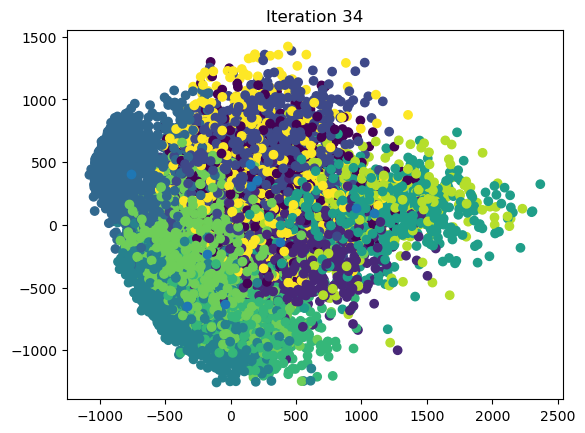

In [36]:
max_iterations = 100
centroid_count = 10

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

sse = 0

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    
    prev_sse = sse
    
    for point, label in zip(df, labels):
        sse += np.square(point - centroids[label]).sum()
    
    current_sse = sse
    
    #print(current_sse)
    
    plot_clusters(df, labels, centroids, iteration)
    
    iteration += 1
    
    if current_sse > prev_sse:
        continue
    else:
        break
    

In [37]:
labels.value_counts()

3    1572
7    1246
4    1173
6    1161
0    1089
2    1081
1     846
9     814
5     554
8     464
dtype: int64

In [22]:
#clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#for point, label in zip(X, labels):
    #clusterwise_sse[label] += np.square(point - centroids[label]).sum()

In [38]:
sse = 0
for point, label in zip(df, labels):
    sse += np.square(point - centroids[label]).sum()

In [39]:
sse

112216704898.93994

### Accuracy check

In [41]:
labels_predicted = labels.tolist()

In [50]:
labels_given = labels_given.label.values.tolist()

In [29]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(labels_given, labels_predicted)

0.0545

### Just for comparison, Scikit learn KMeans is also implemented

In [53]:
X = df.values

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters=10).fit(X)

cluster_centers = [X[kmeans.labels_ == i].mean(axis=0) for i in range(10)]

In [56]:
clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for point, label in zip(X, labels):
    clusterwise_sse[label] += np.square(point - centroids[label]).sum()

In [57]:
sum(clusterwise_sse)

25498502374.431812

## Cosine Similarity

In [60]:
centroids = random_centroids(df, 10)

### Cosine Similarity formula

In [111]:
#cosine_similarity([[3,1,1,6]],[[6,2,1,6]])

array([[0.94750294]])

In [113]:
#from scipy import spatial

#dataSetI = [3,1,1,6]
#dataSetII = [6,2,1,6]
#result = 1 - spatial.distance.cosine(dataSetI, dataSetII) # Formula for Cosine Similarity
#result

0.9475029354336744

### Kmeans algorithm by Cosine Similarity

In [24]:
def get_labels_cosine(df,centroids):
    aa = df.values.tolist()
    
    centroids_1 = centroids.T
    bb= centroids_1.values.tolist()
    
    distances = []
    
    for i in range(len(aa)):
        for j in range(len(bb)):
            distance = 1 - spatial.distance.cosine(aa[i], bb[j]) # Formula for Cosine Similarity
            distances.append(distance)
    
    start = 0
    end = len(distances)
    step = 10  # cluster size
    
    indexes = []
    for m in range(start, end, step):
        x= m
        distance_each_cluster = distances[x:x+10]
        max_value = max(distance_each_cluster)
        max_index = distance_each_cluster.index(max_value)   ## Similarity should be maximum 
        indexes.append(max_index)
        
    indexes = pd.Series(indexes)
    return indexes

In [62]:
labels = get_labels_cosine(df,centroids)

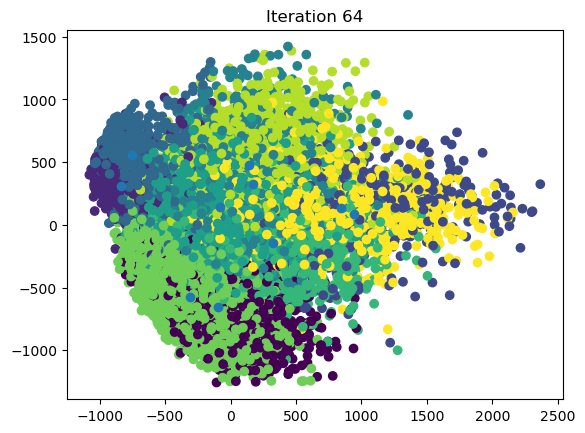

In [64]:
max_iterations = 100
centroid_count = 10

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

sse = 0

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels_cosine(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    
    prev_sse = sse
    
    for point, label in zip(df, labels):
        sse += np.square(point - centroids[label]).sum()
    
    current_sse = sse
    
    #print(current_sse)
    
    plot_clusters(df, labels, centroids, iteration)
    
    iteration += 1
    
    if current_sse > prev_sse:
        continue
    else:
        break

In [65]:
sse = 0
for point, label in zip(df, labels):
    sse += np.square(point - centroids[label]).sum()

In [66]:
sse

112189432905.14214

### Accuracy Check

In [67]:
labels_predicted = labels.tolist()

In [68]:
accuracy_score(labels_given, labels_predicted)

0.2701

## Jarcard Similarity

In [71]:
centroids = random_centroids(df, 10)

### Kmeans algorithm by Jaccard Similarity

In [31]:
def get_labels_jaccard(df,centroids):
    aa = df.values.tolist()
    
    centroids_1 = centroids.T
    bb= centroids_1.values.tolist()
    
    distances = []
    
    for i in range(len(aa)):
        for j in range(len(bb)):
            distance = 1 - spatial.distance.jaccard(aa[i], bb[j]) # Formula for Jaccard Similarity
            distances.append(distance)
    
    start = 0
    end = len(distances)
    step = 10  # cluster size
    
    indexes = []
    for m in range(start, end, step):
        x= m
        distance_each_cluster = distances[x:x+10]
        max_value = max(distance_each_cluster)
        max_index = distance_each_cluster.index(max_value)    
        indexes.append(max_index)
        
    indexes = pd.Series(indexes)
    return indexes

In [73]:
labels = get_labels_jaccard(df,centroids)

In [75]:
max_iterations = 100
centroid_count = 10

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

sse = 0

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels_jaccard(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    
    prev_sse = sse
    
    for point, label in zip(df, labels):
        sse += np.square(point - centroids[label]).sum()
    
    current_sse = sse
    
    #print(current_sse)
    
    #plot_clusters(df, labels, centroids, iteration)
    
    iteration += 1
    
    if current_sse > prev_sse:
        continue
    else:
        break

In [76]:
sse = 0
for point, label in zip(df, labels):
    sse += np.square(point - centroids[label]).sum()
    

In [77]:
sse

111284440946.52905

In [78]:
iteration

100

### Accuracy Check

In [79]:
labels_predicted = labels.tolist()

In [80]:
accuracy_score(labels_given, labels_predicted)

0.0962

## Question 3 and Question 4

### Euclidean Distance

In [8]:
centroids = random_centroids(df, 10)

In [10]:
labels = get_labels(df, centroids)

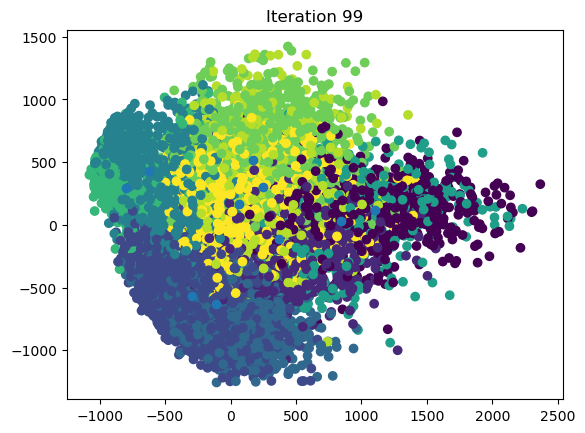

In [14]:
max_iterations = 100
centroid_count = 10

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

sse = 0

while iteration < max_iterations or not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    
    prev_sse = sse
    
    for point, label in zip(df, labels):
        sse += np.square(point - centroids[label]).sum()
    
    current_sse = sse
    
    #print(current_sse)
    
    plot_clusters(df, labels, centroids, iteration)
    
    iteration += 1
    
    if current_sse > prev_sse:
        continue
    else:
        break
    

In [15]:
sse = 0
for point, label in zip(df, labels):
    sse += np.square(point - centroids[label]).sum()
sse

112295459640.17203

### Cosine Similarity

In [25]:
centroids = random_centroids(df, 10)

In [26]:
labels = get_labels_cosine(df, centroids)

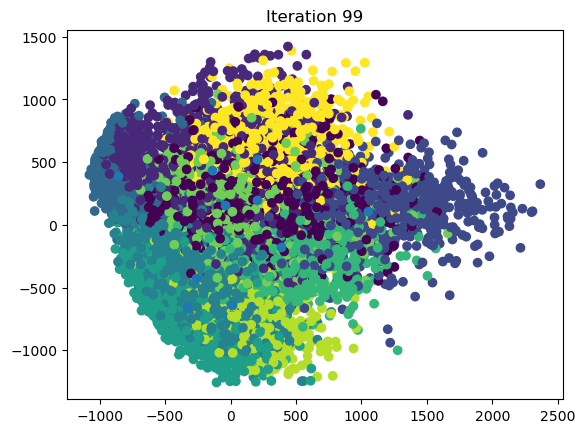

In [27]:
max_iterations = 100
centroid_count = 10

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

sse = 0

while iteration < max_iterations or not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels_cosine(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    
    prev_sse = sse
    
    for point, label in zip(df, labels):
        sse += np.square(point - centroids[label]).sum()
    
    current_sse = sse
    
    #print(current_sse)
    
    plot_clusters(df, labels, centroids, iteration)
    
    iteration += 1
    
    if current_sse > prev_sse:
        continue
    else:
        break

In [28]:
sse = 0
for point, label in zip(df, labels):
    sse += np.square(point - centroids[label]).sum()
sse

112217420417.12846

### Jaccard Similarity

In [29]:
centroids = random_centroids(df, 10)

In [32]:
labels = get_labels_jaccard(df, centroids)

In [35]:
max_iterations = 100
centroid_count = 10

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

sse = 0

while iteration < max_iterations:
#while iteration < max_iterations or not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels_jaccard(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    
    prev_sse = sse
    
    for point, label in zip(df, labels):
        sse += np.square(point - centroids[label]).sum()
    
    current_sse = sse
    
    #print(current_sse)
    
    #plot_clusters(df, labels, centroids, iteration)
    
    iteration += 1
    
    if current_sse > prev_sse:
        continue
    else:
        break

In [36]:
sse = 0
for point, label in zip(df, labels):
    sse += np.square(point - centroids[label]).sum()
sse

111303391187.07967

In [37]:
iteration

100